In [1]:
import warnings 
warnings.filterwarnings("ignore")


In [2]:
!jupyter nbconvert --to html vamshinallagonda_A5_LR.ipynb

[NbConvertApp] Converting notebook vamshinallagonda_A5_LR.ipynb to html
[NbConvertApp] Writing 546338 bytes to vamshinallagonda_A5_LR.html


In [3]:
import warnings
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
import nltk
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,scorer,auc
from sklearn.cross_validation import cross_val_score,cross_val_predict,train_test_split
import re,string
from nltk.corpus import  stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec,keyedvectors

import pickle
from sklearn.preprocessing import Normalizer
from tqdm import tqdm
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

C:\Users\vamshi goud\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vamshi goud\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [4]:
data = ps.read_csv('train_data.csv',nrows=20000)
data2 = ps.read_csv('resources.csv')

In [5]:
from sklearn.preprocessing import Imputer


 #data2.fillna(data2.mean(), inplace=True)
#print(project_data1)

In [6]:
print(data2.isnull())

            id  description  quantity  price
0        False        False     False  False
1        False        False     False  False
2        False        False     False  False
3        False        False     False  False
4        False        False     False  False
5        False        False     False  False
6        False        False     False  False
7        False        False     False  False
8        False        False     False  False
9        False        False     False  False
10       False        False     False  False
11       False        False     False  False
12       False        False     False  False
13       False        False     False  False
14       False        False     False  False
15       False        False     False  False
16       False        False     False  False
17       False        False     False  False
18       False        False     False  False
19       False        False     False  False
20       False        False     False  False
21       F

In [7]:
data3 =data2.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()

print(data3.head)

<bound method NDFrame.head of              id    price  quantity
0       p000001   459.56         7
1       p000002   515.89        21
2       p000003   298.97         4
3       p000004  1113.69        98
4       p000005   485.99         8
5       p000006   130.62         5
6       p000007   157.98         6
7       p000008   296.99        80
8       p000009   306.04        45
9       p000010    11.08        30
10      p000011    12.59        20
11      p000012   135.98         2
12      p000013  2626.63         4
13      p000014   300.78         1
14      p000015   399.99         1
15      p000016     6.24        60
16      p000017    22.99        16
17      p000018   474.05         2
18      p000019   261.43        12
19      p000020   148.39         5
20      p000021    87.78         7
21      p000022   116.00         1
22      p000023   179.99         3
23      p000024    94.38         5
24      p000025    73.91        20
25      p000026   414.06        29
26      p000027   782.13 

In [8]:
print(data3.isnull())

           id  price  quantity
0       False  False     False
1       False  False     False
2       False  False     False
3       False  False     False
4       False  False     False
5       False  False     False
6       False  False     False
7       False  False     False
8       False  False     False
9       False  False     False
10      False  False     False
11      False  False     False
12      False  False     False
13      False  False     False
14      False  False     False
15      False  False     False
16      False  False     False
17      False  False     False
18      False  False     False
19      False  False     False
20      False  False     False
21      False  False     False
22      False  False     False
23      False  False     False
24      False  False     False
25      False  False     False
26      False  False     False
27      False  False     False
28      False  False     False
29      False  False     False
...       ...    ...       ...
260085  

In [9]:
project_data = ps.merge(data,data3,on='id',how='left')
project_data['price'] = project_data['price'].fillna((project_data['price'].mean()))
project_data['quantity'] = project_data['quantity'].fillna((project_data['quantity'].mean()))
#project_data.fillna(project_data.mean(), inplace=True)
print(project_data.head(10))
#print(project_data.isnull())
#print(project_data['price'])

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
5      141660  p154343  a50a390e8327a95b77b9e495b58b9a6e           Mrs.   
6       21147  p099819  9b40170bfa65e399981717ee8731efc3           Mrs.   
7       94142  p092424  5bfd3d12fae3d2fe88684bbac570c9d2            Ms.   
8      112489  p045029  487448f5226005d08d36bdd75f095b31           Mrs.   
9      158561  p001713  140eeac1885c820ad5592a409a3a8994            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22

In [10]:

y = np.array(project_data['project_is_approved'])
x = project_data.drop('project_is_approved',axis=1)

xTrain,xTest,yTrain,yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)
xTrain_c,x_CV,yTrain_c,y_CV   = train_test_split(xTrain,yTrain, test_size = 0.2, random_state =0)
print(x.head(5))

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, 

In [11]:
#text preprocessing of training 'essay' data

xTrain["essay"] = xTrain["project_essay_1"].map(str) +\
                  xTrain["project_essay_2"].map(str) + \
                  xTrain["project_essay_3"].map(str) + \
                  xTrain["project_essay_4"].map(str)


In [12]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTrain['essay'].values[10000])

In [13]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
stopwords= set(stopwords.words('english'))

In [14]:
from tqdm import tqdm
preprocessed_essays_x = []
# tqdm is for printing the status bar
for sentance in tqdm(xTrain['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_x.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:15<00:00, 1032.96it/s]


In [15]:
print(len(preprocessed_essays_x))

16000


In [16]:
xTrain_c["essay"] = xTrain_c["project_essay_1"].map(str) +\
                        xTrain_c["project_essay_2"].map(str) + \
                       xTrain_c ["project_essay_3"].map(str) + \
                       xTrain_c["project_essay_4"].map(str)


In [17]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTrain_c['essay'].values[8000])

In [18]:
from tqdm import tqdm
preprocessed_essays_xc = []
# tqdm is for printing the status bar
for sentance in tqdm(xTrain_c['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_xc.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:12<00:00, 1038.60it/s]


In [19]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTrain['project_title'].values[10000])

In [20]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
from tqdm import tqdm
preprocessed_title_xT = []
# tqdm is for printing the status bar
for sentance in tqdm(xTrain['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sen = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_xT.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 16000/16000 [00:00<00:00, 22020.41it/s]


In [21]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTrain_c['project_title'].values[2000])

In [22]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
from tqdm import tqdm
preprocessed_title_xC = []
# tqdm is for printing the status bar
for sentance in tqdm(xTrain_c['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sen = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_xC.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 12800/12800 [00:00<00:00, 21929.84it/s]


In [23]:
#preprocessing of test data
xTest["essay"] = xTest["project_essay_1"].map(str) +\
                        xTest["project_essay_2"].map(str) + \
                        xTest["project_essay_3"].map(str) + \
                        xTest["project_essay_4"].map(str)


In [24]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTest['essay'].values[2000])

In [25]:
from tqdm import tqdm
preprocessed_essays_xTest = []
# tqdm is for printing the status bar
for sentance in tqdm(xTest['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_xTest.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:03<00:00, 1025.92it/s]


In [26]:
x_CV["essay"] = x_CV["project_essay_1"].map(str) +\
                        x_CV["project_essay_2"].map(str) + \
                       x_CV["project_essay_3"].map(str) + \
                        x_CV["project_essay_4"].map(str)

In [27]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(x_CV['essay'].values[2000])

In [28]:
from tqdm import tqdm
preprocessed_essays_xcvT = []
# tqdm is for printing the status bar
for sentance in tqdm(x_CV['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_xcvT.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 3200/3200 [00:03<00:00, 1029.73it/s]


In [29]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTest['project_title'].values[1000])

In [30]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTrain_c['project_title'].values[5000])

In [31]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
from tqdm import tqdm
preprocessed_title_xt = []
# tqdm is for printing the status bar
for sentance in tqdm(xTest['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_xt.append(sent1.lower().strip())
    

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 18968.28it/s]


In [32]:
print (len(preprocessed_title_xt))

4000


In [33]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
from tqdm import tqdm
preprocessed_title_xt_c = []
# tqdm is for printing the status bar
for sentance in tqdm(xTrain_c['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_xt_c.append(sent1.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 12800/12800 [00:00<00:00, 20615.42it/s]


In [34]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(xTest['project_title'].values[1999])

In [35]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
from tqdm import tqdm
preprocessed_title_cvt = []
# tqdm is for printing the status bar
for sentance in tqdm(x_CV['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1_t = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_cvt.append(sent1.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 3200/3200 [00:00<00:00, 17217.16it/s]


In [36]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(x_CV['project_title'].values[1000])

In [37]:
categories = list(x['project_subject_categories'].values)
# remove special characters from list of strings python:
#https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
# consider we have text like this "Math & Science, Warmth, Care & Hunger"
for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & H

    if 'The' in j.split(): # this will split each of the catogory based on space "Math & Scienc
        j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math &
    temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
    temp = temp.replace('&','_') # we are replacing the & value into
    cat_list.append(temp.strip())
   # print(cat_list.)
    #print(x.le)
#xTrain.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
#xTrain('project_subject_categories') = cat_list
   # x['clean_categories'] = cat_list
    #project_data.drop(['project_subject_categories'], axis=1, inplace=True)
from collections import Counter
my_counter = Counter()
for word in x['project_subject_categories'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)

{'Arts,': 34, 'Needs,': 57, 'Warmth,': 264, 'Care': 264, 'Hunger': 264, 'Civics,': 428, 'Sports,': 516, 'Civics': 629, 'History': 1057, 'Learning': 1070, 'Learning,': 1201, 'Science,': 1480, 'Arts': 1793, 'Music': 1827, 'The': 1827, 'Sports': 2104, 'Applied': 2271, 'Needs': 2447, 'Special': 2504, 'Health': 2620, 'Language,': 4005, 'Language': 5639, 'Science': 6054, 'Math': 7534, 'Literacy': 9644, '&': 22946}


In [38]:
sub_categories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python:
#https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
sub_cat_list = []
for i in sub_categories:
   

    temp = ""
# consider we have text like this "Math & Science, Warmth, Care & Hunger"
for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & H
    if 'The' in j.split(): # this will split each of the catogory based on space "Math & Scienc
        j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(
    j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math &
    temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
    temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
#project_data['clean_subcategories'] = sub_cat_list
#project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['project_subject_subcategories'].values:
    my_counter.update(word.split())
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [39]:
def sentimet_analyser_scores(sentence):
    scores = analyser.polarity_scores(sentance)
    print('{:-<10}{}'.format(sentence,str(scores)))    


In [40]:
#vectorizing the text data
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
xtrain_bow_essay = vectorizer.fit(preprocessed_essays_x)
xtrain_bow_essay = vectorizer.transform(preprocessed_essays_x)
#xTrain_bow_essay_c = vectorizer.fit(preprocessed_essays_xc)
xtrain_bow_essay_c = vectorizer.transform(preprocessed_essays_xc)
xtest_bow_esssay = vectorizer.transform(preprocessed_essays_xTest)
xtest_bow_esssay_cv = vectorizer.transform(preprocessed_essays_xcvT)

print(xtest_bow_esssay.shape)

(4000, 5000)


In [41]:
vectorizer = CountVectorizer()
xtrain_bow_title = vectorizer.fit(preprocessed_title_xT)
xtrain_bow_title =vectorizer.transform(preprocessed_title_xT)
xtrain_bow_title_c = vectorizer.transform(preprocessed_title_xt_c)
xtest_bow_title =vectorizer.transform(preprocessed_title_xt)
xtest_bow_title_cv = vectorizer.transform(preprocessed_title_cvt)

In [42]:
vectorizer_tfid = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
xtrain_tfidf_essay = vectorizer_tfid.fit(preprocessed_essays_x)
xtrain_tfidf_essay = vectorizer_tfid.transform(preprocessed_essays_x)
xtrain_tfidf_essay_cv = vectorizer_tfid.transform(preprocessed_essays_xc)
xtest_tfidf_essay = vectorizer_tfid.transform(preprocessed_essays_xTest)
xtest_tfidf_essay_cv = vectorizer_tfid.transform(preprocessed_essays_xcvT)

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(xTrain['project_subject_categories'].values)
categories_one_hot_train = vectorizer.transform(xTrain['project_subject_categories'].values)
categories_one_hot_test = vectorizer.transform(xTest['project_subject_categories'].values)
categories_one_hot_cv = vectorizer.transform(xTrain_c['project_subject_categories'].values)

In [44]:
vectorizer = CountVectorizer()
vectorizer.fit(xTrain['project_subject_subcategories'].values)
sub_categories_one_hot_train = vectorizer.transform(xTrain['project_subject_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(xTest['project_subject_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(xTrain_c['project_subject_subcategories'].values)

In [45]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

In [46]:
vectorizer = CountVectorizer()
vectorizer.fit(xTrain['school_state'].values)
school_state_categories_one_hot_train = vectorizer.transform(xTrain['school_state'].values)
school_state_categories_one_hot_test = vectorizer.transform(xTest['school_state'].values)
school_state_categories_one_hot_cv = vectorizer.transform(xTrain_c['school_state'].values)

In [47]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
project_grade_dict = dict(my_counter)
sorted_project_grade_dict = dict(sorted(project_grade_dict.items(), key=lambda kv: kv[1]))

In [48]:
vectorizer = CountVectorizer()
vectorizer.fit(xTrain['project_grade_category'].values)
project_grade_categories_one_hot_train = vectorizer.transform(xTrain['project_grade_category'].values)
project_grade_categories_one_hot_test =vectorizer.transform(xTest['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer.transform(xTrain_c['project_grade_category'].values)

In [49]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [50]:
vectorizer = CountVectorizer()
vectorizer.fit(xTrain['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_train =vectorizer.transform(xTrain['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test =vectorizer.transform(xTest['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv =vectorizer.transform(xTrain_c['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())

['mr', 'mrs', 'ms', 'nan', 'teacher']


In [51]:
normalizer = Normalizer()
normalizer.fit(xTrain['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_train = normalizer.transform(xTrain['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_cv = normalizer.transform(xTrain_c['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_test = normalizer.transform(xTest['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_train = prev_projects_train.reshape(-1,1)
prev_projects_cv = prev_projects_cv.reshape(-1,1)
prev_projects_test =prev_projects_test.reshape(-1,1)

In [60]:
normalizer = Normalizer()
normalizer.fit(xTrain['quantity'].values.reshape(1,-1))
quant_projects_train = normalizer.transform(xTrain['quantity'].values.reshape(1,-1))
quant_projects_cv = normalizer.transform(xTrain_c['quantity'].values.reshape(1,-1))
quant_projects_test = normalizer.transform(xTest['quantity'].values.reshape(1,-1))
quant_projects_train =quant_projects_train.reshape(-1,1)
quant_projects_cv = quant_projects_cv.reshape(-1,1)
quant_projects_test = quant_projects_test.reshape(-1,1)

In [61]:
normalizer = Normalizer()
normalizer.fit(xTrain['price'].values.reshape(1,-1))
price_projects_train = normalizer.transform(xTrain['price'].values.reshape(1,-1))
price_projects_cv = normalizer.transform(xTrain_c['price'].values.reshape(1,-1))
price_projects_test = normalizer.transform(xTest['price'].values.reshape(1,-1))
price_projects_train = price_projects_train.reshape(-1,1)
price_projects_cv = price_projects_cv.reshape(-1,1)
price_projects_test = price_projects_test.reshape(-1,1)


In [62]:
from scipy.sparse import hstack
features=hstack((prev_projects_train,project_grade_categories_one_hot_train,categories_one_hot_train,teacher_prefix_categories_one_hot_train,sub_categories_one_hot_train,xtrain_bow_essay,xtrain_bow_title,quant_projects_train,price_projects_train)).tocsr()
features = features.toarray()
print(features.shape)
print(features.shape)

(16000, 11953)
(16000, 11953)


In [63]:
features_cv = hstack((quant_projects_cv,price_projects_cv,prev_projects_cv,project_grade_categories_one_hot_cv,categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,sub_categories_one_hot_cv,xtrain_bow_essay_c,xtrain_bow_title_c))
features_cv = features_cv.toarray()
print(features_cv.shape)

(12800, 11953)


In [64]:
xTest_features = hstack((quant_projects_test,price_projects_test,prev_projects_test,project_grade_categories_one_hot_test,categories_one_hot_test,teacher_prefix_categories_one_hot_test,sub_categories_one_hot_test,xtest_bow_title,xtest_bow_esssay)).tocsr()
xTest_features = xTest_features.toarray()
print(xTest_features.shape)

(4000, 11953)


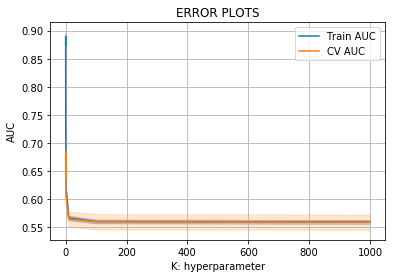

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
#CLG = LogisticRegression()
train_auc = []
cv_auc = []
k = [10**x for x in range (-4,4)]
SGD=SGDClassifier(loss='log')

parameters = {
    'alpha':[10**x for x in range (-4,4)]
}   
clf_R = RandomizedSearchCV(SGD,param_distributions = parameters, n_iter=8, cv=5, scoring='roc_auc')
clf_R.fit(features, yTrain)

y_train_pred =  clf_R.predict_proba(features)[:,1]
y_cv_pred =  clf_R.predict_proba(features_cv)[:,1]
    
train_auc.append(roc_auc_score(yTrain,y_train_pred))
cv_auc.append(roc_auc_score(yTrain_c, y_cv_pred))
train_auc= clf_R.cv_results_['mean_train_score']
train_auc_std= clf_R.cv_results_['std_train_score']
cv_auc = clf_R.cv_results_['mean_test_score'] 
cv_auc_std= clf_R.cv_results_['std_test_score']

plt.plot(k, train_auc, label='Train AUC')
plt.gca().fill_between(k,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(k, cv_auc, label='CV AUC')
plt.gca().fill_between(k,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()  



In [66]:
print(clf_R.best_score_)
print(clf_R.best_params_)
print(clf_R.best_estimator_)
y_test_pred = clf_R.predict_proba(xTest_features)[:,1]

0.6846754461247371
{'alpha': 0.01}
SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


[[0.43938421 0.56061579]
 [0.46070219 0.53929781]
 [0.48118485 0.51881515]
 ...
 [0.41022088 0.58977912]
 [0.47826488 0.52173512]
 [0.47802811 0.52197189]]


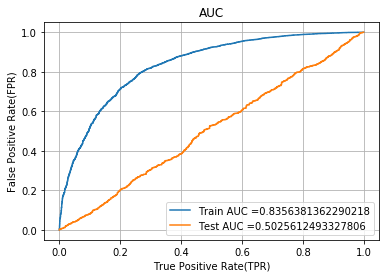

In [67]:
neigh = SGDClassifier( alpha=0.01,loss = 'log')
final1 = neigh.fit(features, yTrain)
final = neigh.predict_proba(xTest_features)
print(final)
train_fpr, train_tpr, tr_thresholds = roc_curve(yTrain, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(yTest, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Observations

1) From above plot we can say that model was overfit ,why beacuse the train auc and test auc scores has huge diffrence

In [68]:
from sklearn.metrics import confusion_matrix
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(yTrain, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(yTest, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5835147251660394 for threshold 0.814
Train confusion matrix
[[ 1819   663]
 [ 2755 10763]]
Test confusion matrix
[[ 538   29]
 [3291  142]]


   actual values:NO  actual value:YES
0              1819               663
1              2755             10763


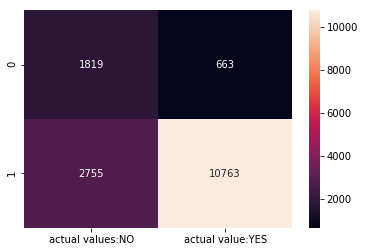

In [69]:
#plt.figure(figsize=(2,2))
heatmap_matrix = ps.DataFrame(confusion_matrix(yTrain, predict_with_best_t(y_train_pred, best_t)),columns=["actual values:NO",'actual value:YES'])

print(heatmap_matrix)
sn.heatmap(heatmap_matrix,annot=True, fmt='g')  
plt.show()

In [70]:
vectorizer_tfid = TfidfVectorizer()
xtrain_tfidf_title = vectorizer_tfid.fit(preprocessed_title_xT)
xtrain_tfidf_title =vectorizer_tfid.transform(preprocessed_title_xT)
xtrain_tfidf_title_cv = vectorizer_tfid.transform(preprocessed_title_xC)
xtest_tfidf_title =vectorizer_tfid.transform(preprocessed_title_xt)
xtest_tfidf_title_cv = vectorizer_tfid.transform(preprocessed_title_cvt)

In [71]:
from scipy.sparse import hstack
features_tfid_R=hstack((quant_projects_train,price_projects_train,prev_projects_train,project_grade_categories_one_hot_train,categories_one_hot_train,teacher_prefix_categories_one_hot_train,sub_categories_one_hot_train,xtrain_tfidf_essay,xtrain_tfidf_title)).tocsr()
features_tfid_R = features_tfid_R.toarray()
print(features_tfid_R.shape)

(16000, 11953)


In [72]:
features_cv_tfid = hstack((quant_projects_cv,price_projects_cv,prev_projects_cv,project_grade_categories_one_hot_cv,categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,sub_categories_one_hot_cv,xtrain_tfidf_essay_cv,xtrain_tfidf_title_cv))
features_cv_tfid = features_cv_tfid.toarray()
print(features_cv_tfid.shape)

(12800, 11953)


In [73]:
xTest_features_tfid = hstack((quant_projects_test,price_projects_test,prev_projects_test,project_grade_categories_one_hot_test,categories_one_hot_test,teacher_prefix_categories_one_hot_test,sub_categories_one_hot_test,xtest_tfidf_essay,xtest_tfidf_title)).tocsr()
xTest_features_tfid = xTest_features_tfid.toarray()
print(xTest_features_tfid.shape)

(4000, 11953)


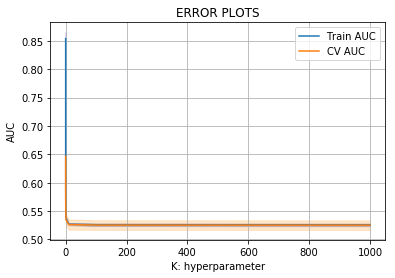

In [74]:

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
train_auc_tfid = []
cv_auc_tfid = []
k = [10**x for x in range (-4,4)]
SGD=SGDClassifier(loss='log')

parameters = {
    'alpha':[10**x for x in range (-4,4)]
}   
clf_R1 = RandomizedSearchCV(SGD,param_distributions = parameters, n_iter=8, cv=5, scoring='roc_auc')
clf_R1.fit(features_tfid_R, yTrain)

y_train_pred1 =  clf_R1.predict_proba(features_tfid_R)[:,1]
y_cv_pred1 =  clf_R1.predict_proba(features_cv_tfid)[:,1]
    
train_auc_tfid.append(roc_auc_score(yTrain,y_train_pred1))
cv_auc_tfid.append(roc_auc_score(yTrain_c, y_cv_pred1))
train_auc= clf_R1.cv_results_['mean_train_score']
train_auc_std= clf_R1.cv_results_['std_train_score']
cv_auc = clf_R1.cv_results_['mean_test_score'] 
cv_auc_std= clf_R1.cv_results_['std_test_score']

plt.plot(k, train_auc, label='Train AUC')
plt.gca().fill_between(k,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(k, cv_auc, label='CV AUC')
plt.gca().fill_between(k,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()  



In [75]:
print(clf_R1.best_score_)
print(clf_R1.best_params_)
print(clf_R1.best_estimator_)
y_test_pred_tfid = clf_R1.predict_proba(xTest_features_tfid)[:,1]

0.6464952420823762
{'alpha': 0.0001}
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


[[0.07604637 0.92395363]
 [0.46340048 0.53659952]
 [0.31275532 0.68724468]
 ...
 [0.28117804 0.71882196]
 [0.21342643 0.78657357]
 [0.21745591 0.78254409]]


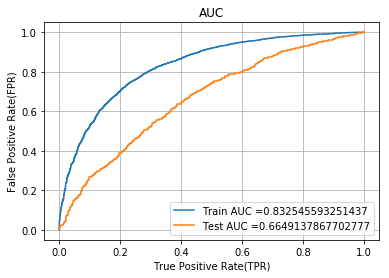

In [76]:
##https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
SGD=SGDClassifier(loss='log',alpha=0.0001)

final1 = SGD.fit(features_tfid_R, yTrain)
final = SGD.predict_proba(xTest_features_tfid)
print(final)
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(yTrain, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(yTest, y_test_pred_tfid)
plt.plot(train_fpr1, train_tpr1, label="Train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="Test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Observations

1) From above plot we can say that ,the model performance is better by using tfid text vectorization

2)But some how we can say model was overfitted, by seein train and test auc scores

In [77]:
from sklearn.metrics import confusion_matrix
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds1, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(yTrain, predict_with_best_t(y_train_pred1, best_t)))
print("Test confusion matrix")
print(confusion_matrix(yTest, predict_with_best_t(y_test_pred_tfid, best_t)))

the maximum value of tpr*(1-fpr) 0.5735011270375882 for threshold 0.792
Train confusion matrix
[[ 1898   584]
 [ 3380 10138]]
Test confusion matrix
[[ 312  255]
 [1042 2391]]


   actual values:NO  actual value:YES
0              1898               584
1              3380             10138


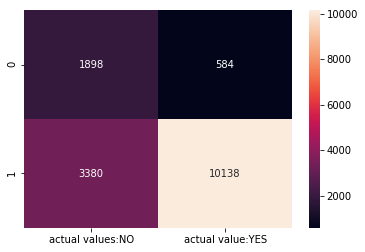

In [78]:
heatmap_matrix = ps.DataFrame(confusion_matrix(yTrain, predict_with_best_t(y_train_pred1, best_t)),columns=["actual values:NO",'actual value:YES'])
print(heatmap_matrix)
sn.heatmap(heatmap_matrix,annot=True, fmt='g')  
plt.show()

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52fanalyser = SentimentIntensityAnalyzer()
essay1 = str(ps.DataFrame(xTrain['project_essay_1']))
essay1_t = str(ps.DataFrame(xTrain_c['project_essay_1']))
essay1_te = str(ps.DataFrame(xTest['project_essay_1']))
x = []
x_t = []
x_te = []
#essay1 = str(essay1)
#print(essay1)
analyser = SentimentIntensityAnalyzer()


def sentimet_analyser_scores(essay1):
    
    scores1 = analyser.polarity_scores(essay1)
    x.append(scores1)
    print(x)
    scores1_t = analyser.polarity_scores(essay1_t)
    x_t.append(scores1_t)
    print(x_t)
    scores1_te = analyser.polarity_scores(essay1_te)
    x_te.append(scores1_te)
    print(x_te)
    #print('{:-<10}{}'.format(essay1,str(scores1)))
    #print('{:-<10}{}'.format(essay1_t,str(scores1_t)))
   # print('{:-<10}{}'.format(essay1_te,str(scores1_te)))
    
    #essay1 = str(ps.DataFrame(project_data['project_essay_1']))
    #
    
#print(essay_1.shape())
    


In [80]:
(sentimet_analyser_scores(essay1))

[{'neg': 0.009, 'neu': 0.843, 'pos': 0.148, 'compound': 0.9979}]
[{'neg': 0.034, 'neu': 0.853, 'pos': 0.113, 'compound': 0.9918}]
[{'neg': 0.013, 'neu': 0.782, 'pos': 0.205, 'compound': 0.9989}]


In [81]:
y = []
y_t = []
y_te = []

essay2 = str(ps.DataFrame(xTrain['project_essay_2']))
essay2_t = str(ps.DataFrame(xTrain_c['project_essay_2']))
essay2_te = str(ps.DataFrame(xTest['project_essay_2']))

def sentimet_analyser_scores2(essay2):
    scores2 = np.array(analyser.polarity_scores(essay2))
    y.append(scores2)
    scores2_t = np.array(analyser.polarity_scores(essay2_t))
    y_t.append(scores2_t)
    scores2_te = np.array(analyser.polarity_scores(essay2_te))
    y_te.append(scores2_te)
    
    #essay_2 = (sentimet_analyser_scores2(essay2))
    
    
   # print('{:-<10}{}'.format(essay2,str(scores2)))

sentimet_analyser_scores2(essay2)

In [82]:
z = []
z_t = []
z_te = []

essay3 = str(ps.DataFrame(xTrain['project_essay_3']))
essay3_t = str(ps.DataFrame(xTrain_c['project_essay_3']))
essay3_te = str(ps.DataFrame(xTest['project_essay_3']))

def sentimet_analyser_scores3(essay3):
    
    scores3 = np.array(analyser.polarity_scores(essay3))
    z.append(scores3)
    scores3_t = np.array(analyser.polarity_scores(essay3_t))
    z_t.append(scores3_t)
    scores3_te = np.array(analyser.polarity_scores(essay3_te))
    z_te.append(scores3_te)
        

    #essay_2 = (sentimet_analyser_scores2(essay2))
    
    
    #print('{:-<10}{}'.format(essay3,str(scores3)))
    
sentimet_analyser_scores3(essay3)

In [83]:
L = []
L_T = []
L_TE = []
essay4 = str(ps.DataFrame(xTrain['project_essay_4']))
essay4_t = str(ps.DataFrame(xTrain_c['project_essay_4']))
essay4_te = str(ps.DataFrame(xTest['project_essay_4']))
def sentimet_analyser_scores4(essay4):
    
    scores4 = np.array(analyser.polarity_scores(essay4))
    L.append(scores4)
    scores4_t = np.array(analyser.polarity_scores(essay4_t))
    L_T.append(scores4_t)
    scores4_te = np.array(analyser.polarity_scores(essay4_te))
    L_TE.append(scores4_te)
    #essay_2 = (sentimet_analyser_scores2(essay2))
    
    
    #print('{:-<10}{}'.format(essay4,str(scores4_t)))
sentimet_analyser_scores4(essay4)


In [84]:
project_data['essay'] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)
essay = str (ps.DataFrame(project_data['essay']))
print(essay)
#fullEssay = str(essay)  

print(essay.split())



                                                   essay
0      My students are English learners that are work...
1      Our students arrive to our school eager to lea...
2      \r\n\"True champions aren't always the ones th...
3      I work at a unique school filled with both ESL...
4      Our second grade classroom next year will be m...
5      I will be moving from 2nd grade to 3rd grade a...
6      My students are a dynamic and very energetic g...
7      Not only do our students struggle with poverty...
8      My students are enthusiastic and inquisitive l...
9      Over 95% of my students are on free or reduced...
10     \"There are many little ways to enlarge your w...
11     All of our students receive free breakfast, lu...
12     My students are always working on new projects...
13     I teach in a small school district in central ...
14     My students are my babies...I want the world f...
15     Located in West Dallas, my students face sever...
16     My Preschool children, a

['essay', '0', 'My', 'students', 'are', 'English', 'learners', 'that', 'are', 'work...', '1', 'Our', 'students', 'arrive', 'to', 'our', 'school', 'eager', 'to', 'lea...', '2', '\\r\\n\\"True', 'champions', "aren't", 'always', 'the', 'ones', 'th...', '3', 'I', 'work', 'at', 'a', 'unique', 'school', 'filled', 'with', 'both', 'ESL...', '4', 'Our', 'second', 'grade', 'classroom', 'next', 'year', 'will', 'be', 'm...', '5', 'I', 'will', 'be', 'moving', 'from', '2nd', 'grade', 'to', '3rd', 'grade', 'a...', '6', 'My', 'students', 'are', 'a', 'dynamic', 'and', 'very', 'energetic', 'g...', '7', 'Not', 'only', 'do', 'our', 'students', 'struggle', 'with', 'poverty...', '8', 'My', 'students', 'are', 'enthusiastic', 'and', 'inquisitive', 'l...', '9', 'Over', '95%', 'of', 'my', 'students', 'are', 'on', 'free', 'or', 'reduced...', '10', '\\"There', 'are', 'many', 'little', 'ways', 'to', 'enlarge', 'your', 'w...', '11', 'All', 'of', 'our', 'students', 'receive', 'free', 'breakfast,', 'lu...', '12', 'My

In [85]:
sentimetal = np. vstack([x,y,z,L])
print(sentimetal.shape)

(4, 1)


In [86]:
length1 = []
normalizer = Normalizer()
for title in xTrain['essay']:

    length = np.array(len(essay.split()))
    length2 = length.reshape(-1,1)
    length1.append(length2)

print(length)
normalizer.fit_transform(length)
length = normalizer.transform(length)
print(length2.shape)
numerical1 = np.vstack(length1)
print(numerical1.shape)

603
(1, 1)
(16000, 1)


In [87]:
length1_c = []
normalizer = Normalizer()
for title in xTrain_c['essay']:

    length = np.array(len(essay.split()))
    length2 = length.reshape(-1,1)
    length1_c.append(length2)

print(length)
normalizer.fit_transform(length)
length = normalizer.transform(length)
print(length2.shape)
numerical1_c = np.vstack(length1_c)
print(numerical1.shape)

603
(1, 1)
(16000, 1)


In [88]:
length1_te = []
normalizer = Normalizer()
for title in xTest['essay']:

    length = np.array(len(essay.split()))
    length2 = length.reshape(-1,1)
    length1_te.append(length2)

print(length)
normalizer.fit_transform(length)
length = normalizer.transform(length)
print(length2.shape)
numerical1_te = np.vstack(length1_te)
print(numerical1_te.shape)

603
(1, 1)
(4000, 1)


In [89]:
title1 = []
for title in xTrain['project_title']:

    b = np.array(len(title.split()))
    b1 =  b.reshape(-1,1)
    
    title1.append(b1)
#print(title1)
numerical2 = np.vstack(title1)


In [90]:
title1_c = []
for title in xTrain_c['project_title']:

    b = np.array(len(title.split()))
    b1 =  b.reshape(-1,1)
    
    title1_c.append(b1)
#print(title1)
numerical2_c = np.vstack(title1_c)


In [91]:
title1_te = []
for title in xTest['project_title']:

    b = np.array(len(title.split()))
    b1 =  b.reshape(-1,1)
    
    title1_te.append(b1)
#print(title1)
numerical2_te = np.vstack(title1_te)
numerical_total_t = np.vstack((numerical1,numerical2))
numerical_total_c = np.vstack((numerical1_c,numerical2_c))
numerical_total_te = np.vstack((numerical1_te,numerical2_te))
print(numerical2_te.shape)
print(numerical1.shape)
print(quant_projects_train.shape)
print(price_projects_train.shape)
print(prev_projects_train.shape)

(4000, 1)
(16000, 1)
(16000, 1)
(16000, 1)
(16000, 1)


In [92]:
numerical_features_t = hstack((numerical1,numerical2,quant_projects_train,price_projects_train,sub_categories_one_hot_train,categories_one_hot_train,teacher_prefix_categories_one_hot_train,project_grade_categories_one_hot_train))
numerical_features_t = numerical_features_t.toarray()
print(numerical_features_t.shape)

(16000, 78)


In [93]:
numerical_features_c = hstack((numerical1_c,numerical2_c,quant_projects_cv,price_projects_cv,sub_categories_one_hot_cv,categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,project_grade_categories_one_hot_cv))
numerical_features_c = numerical_features_c.toarray()
print(numerical_features_c.shape)

(12800, 78)


In [94]:
numerical_features_te = hstack((numerical1_te,numerical2_te,quant_projects_test,price_projects_test,sub_categories_one_hot_test,categories_one_hot_test,teacher_prefix_categories_one_hot_test,project_grade_categories_one_hot_test))
numerical_features_te = numerical_features_te.toarray()
print(numerical_features_te.shape)

(4000, 78)


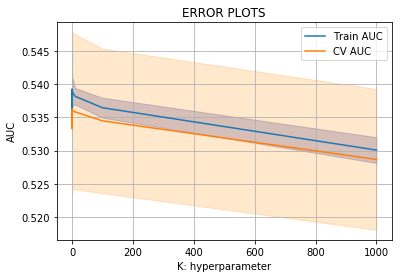

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
#CLG = LogisticRegression()
train_auc = []
cv_auc = []
k = [10**x for x in range (-4,4)]
SGD=SGDClassifier(loss='log')

parameters = {
    'alpha':[10**x for x in range (-4,4)]
}   
clf_Rn = RandomizedSearchCV(SGD,param_distributions = parameters, n_iter=8, cv=5, scoring='roc_auc')
clf_Rn.fit(numerical_features_t, yTrain)

y_train_pred_n =  clf_Rn.predict_proba(numerical_features_t)[:,1]
y_cv_pred_n =  clf_Rn.predict_proba(numerical_features_c)[:,1]
    
train_auc.append(roc_auc_score(yTrain,y_train_pred_n))
cv_auc.append(roc_auc_score(yTrain_c, y_cv_pred_n))
train_auc= clf_Rn.cv_results_['mean_train_score']
train_auc_std= clf_Rn.cv_results_['std_train_score']
cv_auc = clf_Rn.cv_results_['mean_test_score'] 
cv_auc_std= clf_Rn.cv_results_['std_test_score']

plt.plot(k, train_auc, label='Train AUC')
plt.gca().fill_between(k,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(k, cv_auc, label='CV AUC')
plt.gca().fill_between(k,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()  

In [96]:
print(clf_Rn.best_score_)
print(clf_Rn.best_params_)
print(clf_Rn.best_estimator_)
y_test_pred_n = clf_Rn.predict_proba(numerical_features_te)[:,1]
print(y_test_pred_n)

0.5361986720545084
{'alpha': 0.0001}
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
[1. 1. 1. ... 1. 1. 1.]


[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


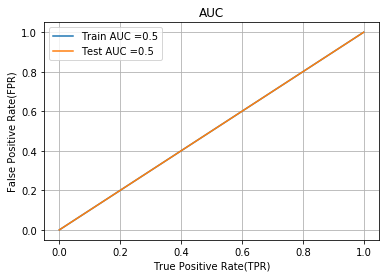

In [98]:
SGD=SGDClassifier(loss='log',alpha=0.0001)

final1 = SGD.fit(numerical_features_t, yTrain)
final = SGD.predict_proba(numerical_features_te)
print(final)
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(yTrain, y_train_pred_n)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(yTest, y_test_pred_n)
plt.plot(train_fpr1, train_tpr1, label="Train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="Test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Observations

1)From above plot we can say that ,the model performance was worst ,by using sentimental scores

2)its neigther above or below the curve,

In [148]:
from sklearn.metrics import confusion_matrix
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_n = find_best_threshold(tr_thresholds, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(yTrain, predict_with_best_t(y_train_pred_n, best_t_n)))
print("Test confusion matrix")
print(confusion_matrix(yTest, predict_with_best_t(y_test_pred_n, best_t_n)))

the maximum value of tpr*(1-fpr) 0.4384645345287669 for threshold 0.787
Train confusion matrix
[[    0  2482]
 [    0 13518]]
Test confusion matrix
[[   0  567]
 [   0 3433]]


   actual values:NO  actual value:YES
0                 0              2482
1                 0             13518


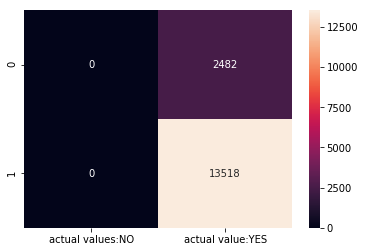

In [149]:
heatmap_matrix = ps.DataFrame(confusion_matrix(yTrain, predict_with_best_t(y_train_pred_n, best_t_n)),columns=["actual values:NO",'actual value:YES'])
print(heatmap_matrix)
sn.heatmap(heatmap_matrix,annot=True, fmt='g')  
plt.show()

In [100]:
from tqdm import tqdm
import pickle
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.300d.txt')
with open('glove.6B.200d.txt', 'rb') as f:
    
   # model = pickle.load()
    glove_words =  set(model.keys())

Loading Glove Model


400000it [01:31, 4368.64it/s]


Done. 400000  words loaded!


In [101]:
avg_w2v_v_xtrain = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_x): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_v_xtrain.append(vector)
print(len(avg_w2v_v_xtrain))
print(len(avg_w2v_v_xtrain[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:11<00:00, 1336.23it/s]


16000
300


In [102]:
avg_w2v_v_xtest = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xTest): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_v_xtest.append(vector)
print(len(avg_w2v_v_xtest))
print(len(avg_w2v_v_xtest[0]))

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:03<00:00, 1079.78it/s]


4000
300


In [103]:
avg_w2v_v_xcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xc): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_v_xcv.append(vector)
print(len(avg_w2v_v_xcv))
print(len(avg_w2v_v_xcv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:07<00:00, 1639.65it/s]


12800
300


In [104]:
avg_w2v_v_xt_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_xt): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_v_xt_title.append(vector)
print(len(avg_w2v_v_xt_title))
print(len(avg_w2v_v_xt_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 13945.12it/s]


4000
300


In [105]:
avg_w2v_v_xte_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_xT): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_v_xte_title.append(vector)
print(len(avg_w2v_v_xte_title))
print(len(avg_w2v_v_xte_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16000/16000 [00:00<00:00, 21206.87it/s]


16000
300


In [106]:
avg_w2v_v_xcv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_xC): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_v_xcv_title.append(vector)
print(len(avg_w2v_v_xcv_title))
print(len(avg_w2v_v_xcv_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 12800/12800 [00:00<00:00, 26545.89it/s]


12800
300


In [128]:
from scipy.sparse import hstack
features_tfid_av=hstack((quant_projects_train,price_projects_train,prev_projects_train,project_grade_categories_one_hot_train,categories_one_hot_train,teacher_prefix_categories_one_hot_train,sub_categories_one_hot_train,avg_w2v_v_xtrain,avg_w2v_v_xte_title)).tocsr()
features_tfid_av = features_tfid_av.toarray()
print(features_tfid_av.shape)

(16000, 677)


In [129]:
features_cv_av = hstack((quant_projects_cv,price_projects_cv,prev_projects_cv,project_grade_categories_one_hot_cv,categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,sub_categories_one_hot_cv,avg_w2v_v_xcv,avg_w2v_v_xcv_title))
features_cv_av = features_cv_av.toarray()
print(features_cv_av.shape)

(12800, 677)


In [130]:
xTest_features_av = hstack((quant_projects_test,price_projects_test,prev_projects_test,project_grade_categories_one_hot_test,categories_one_hot_test,teacher_prefix_categories_one_hot_test,sub_categories_one_hot_test,avg_w2v_v_xtest,avg_w2v_v_xt_title)).tocsr()
xTest_features_av = xTest_features_av.toarray()
print(xTest_features_av.shape)

(4000, 677)


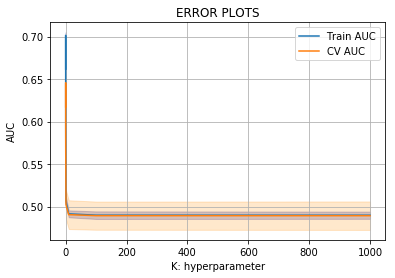

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
train_auc_tfid = []
cv_auc_tfid = []
k = [10**x for x in range (-4,4)]
SGD=SGDClassifier(loss='log')

parameters = {
    'alpha':[10**x for x in range (-4,4)]
}   
clf_av = RandomizedSearchCV(SGD,param_distributions = parameters, n_iter=8, cv=5, scoring='roc_auc')
clf_av.fit(features_tfid_av, yTrain)

y_train_pred1 =  clf_av.predict_proba(features_tfid_av)[:,1]
y_cv_pred1 =  clf_av.predict_proba(features_cv_av)[:,1]
    
train_auc_tfid.append(roc_auc_score(yTrain,y_train_pred1))
cv_auc_tfid.append(roc_auc_score(yTrain_c, y_cv_pred1))
train_auc= clf_av.cv_results_['mean_train_score']
train_auc_std= clf_av.cv_results_['std_train_score']
cv_auc = clf_av.cv_results_['mean_test_score'] 
cv_auc_std= clf_av.cv_results_['std_test_score']

plt.plot(k, train_auc, label='Train AUC')
plt.gca().fill_between(k,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(k, cv_auc, label='CV AUC')
plt.gca().fill_between(k,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()  

In [133]:
print(clf_av.best_score_)
print(clf_av.best_params_)
print(clf_av.best_estimator_)
y_test_pred_tfid = clf_av.predict_proba(xTest_features_av)[:,1]

0.645594950890523
{'alpha': 0.001}
SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


[[0.16220025 0.83779975]
 [0.19466904 0.80533096]
 [0.16137255 0.83862745]
 ...
 [0.31242969 0.68757031]
 [0.05185776 0.94814224]
 [0.45075375 0.54924625]]


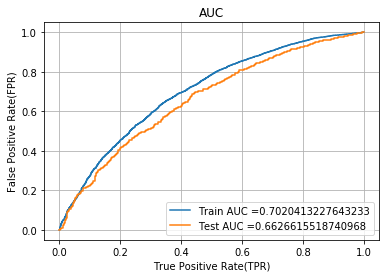

In [134]:
SGD=SGDClassifier(loss='log',alpha=0.001)

final1 = SGD.fit(features_tfid_av, yTrain)
final = SGD.predict_proba(xTest_features_av)
print(final)
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(yTrain, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(yTest, y_test_pred_tfid)
plt.plot(train_fpr1, train_tpr1, label="Train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="Test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [150]:
from sklearn.metrics import confusion_matrix
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_tf = find_best_threshold(tr_thresholds, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(yTrain, predict_with_best_t(y_train_pred1, best_t_tf)))
print("Test confusion matrix")
print(confusion_matrix(yTest, predict_with_best_t(y_test_pred_tfid, best_t_tf)))

the maximum value of tpr*(1-fpr) 0.4384645345287669 for threshold 0.787
Train confusion matrix
[[ 1184  1298]
 [ 2575 10943]]
Test confusion matrix
[[  20  547]
 [  34 3399]]


   actual values:NO  actual value:YES
0              1184              1298
1              2575             10943


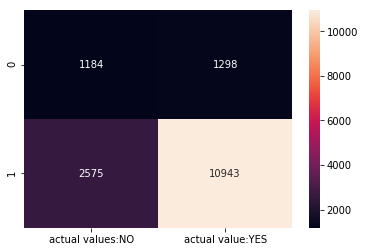

In [151]:
heatmap_matrix = ps.DataFrame(confusion_matrix(yTrain, predict_with_best_t(y_train_pred1, best_t_tf)),columns=["actual values:NO",'actual value:YES'])
print(heatmap_matrix)
sn.heatmap(heatmap_matrix,annot=True, fmt='g')  
plt.show()

In [108]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_x)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_x = set(tfidf_model.get_feature_names())

In [109]:
tfidf_w2v_v_xTr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_x): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_x):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_v_xTr.append(vector)

print(len(tfidf_w2v_v_xTr))
print(len(tfidf_w2v_v_xTr[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16000/16000 [01:07<00:00, 236.30it/s]


16000
300


In [110]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_xTest)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_xtest = set(tfidf_model.get_feature_names())

In [111]:
tfidf_w2v_v_xTe = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xTest): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_xtest):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_v_xTe.append(vector)

print(len(tfidf_w2v_v_xTe))
print(len(tfidf_w2v_v_xTe[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:17<00:00, 223.68it/s]


4000
300


In [112]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_xc)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_xc = set(tfidf_model.get_feature_names())

In [113]:
tfidf_w2v_v_xcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xc): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_xc):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_v_xcv.append(vector)

print(len(tfidf_w2v_v_xcv))
print(len(tfidf_w2v_v_xcv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 12800/12800 [00:53<00:00, 237.14it/s]


12800
300


In [114]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_xt)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_xt = set(tfidf_model.get_feature_names())

In [115]:
tfidf_w2v_v_xTr_t = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_xt): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_xt):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_v_xTr_t.append(vector)

print(len(tfidf_w2v_v_xTr_t))
print(len(tfidf_w2v_v_xTr_t[0]))

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 15046.39it/s]


4000
300


In [116]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_xT)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_xT = set(tfidf_model.get_feature_names())

In [117]:
tfidf_w2v_v_xTe_ti = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_xT): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_xT):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_v_xTe_ti.append(vector)

print(len(tfidf_w2v_v_xTe_ti))
print(len(tfidf_w2v_v_xTe_ti[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16000/16000 [00:01<00:00, 14809.57it/s]


16000
300


In [118]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_xC)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_xC = set(tfidf_model.get_feature_names())

In [119]:
tfidf_w2v_v_xcv_ti = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_xC): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_xC):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_v_xcv_ti.append(vector)

print(len(tfidf_w2v_v_xcv_ti))
print(len(tfidf_w2v_v_xcv_ti[0]))

100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:01<00:00, 8584.01it/s]


12800
300


In [137]:
from scipy.sparse import hstack
features_tfid_w2v=hstack((quant_projects_train,price_projects_train,prev_projects_train,project_grade_categories_one_hot_train,categories_one_hot_train,teacher_prefix_categories_one_hot_train,sub_categories_one_hot_train,tfidf_w2v_v_xTr,tfidf_w2v_v_xTe_ti)).tocsr()
features_tfid_av = features_tfid_w2v.toarray()
print(features_tfid_w2v.shape)

(16000, 677)


In [140]:
features_cv_w2v = hstack((quant_projects_cv,price_projects_cv,prev_projects_cv,project_grade_categories_one_hot_cv,categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,sub_categories_one_hot_cv,tfidf_w2v_v_xcv ,tfidf_w2v_v_xcv_ti))
features_cv_w2v = features_cv_w2v.toarray()
print(features_cv_av.shape)

(12800, 677)


In [141]:
xTest_features_w2v = hstack((quant_projects_test,price_projects_test,prev_projects_test,project_grade_categories_one_hot_test,categories_one_hot_test,teacher_prefix_categories_one_hot_test,sub_categories_one_hot_test,tfidf_w2v_v_xTe,tfidf_w2v_v_xTr_t)).tocsr()
xTest_features_w2v = xTest_features_w2v.toarray()
print(xTest_features_w2v.shape)

(4000, 677)


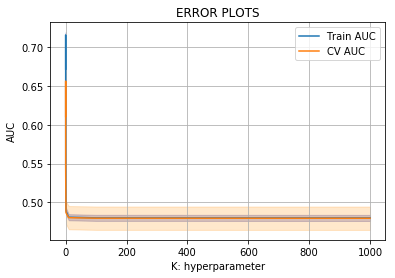

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
train_auc_tfid = []
cv_auc_tfid = []
k = [10**x for x in range (-4,4)]
SGD=SGDClassifier(loss='log')

parameters = {
    'alpha':[10**x for x in range (-4,4)]
}   
clf_w2v = RandomizedSearchCV(SGD,param_distributions = parameters, n_iter=8, cv=5, scoring='roc_auc')
clf_w2v.fit(features_tfid_w2v, yTrain)

y_train_pred1_w2v =  clf_w2v.predict_proba(features_tfid_w2v)[:,1]
y_cv_pred1_w2v =  clf_w2v.predict_proba(features_cv_w2v)[:,1]
    
train_auc_tfid.append(roc_auc_score(yTrain,y_train_pred1_w2v))
cv_auc_tfid.append(roc_auc_score(yTrain_c, y_cv_pred1_w2v))
train_auc= clf_w2v.cv_results_['mean_train_score']
train_auc_std= clf_w2v.cv_results_['std_train_score']
cv_auc = clf_w2v.cv_results_['mean_test_score'] 
cv_auc_std= clf_w2v.cv_results_['std_test_score']

plt.plot(k, train_auc, label='Train AUC')
plt.gca().fill_between(k,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(k, cv_auc, label='CV AUC')
plt.gca().fill_between(k,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()  

In [146]:
print(clf_w2v.best_score_)
print(clf_w2v.best_params_)
print(clf_w2v.best_estimator_)
y_test_pred_w2v = clf_av.predict_proba(xTest_features_w2v)[:,1]

0.6562264301564743
{'alpha': 0.001}
SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


[[0.16579985 0.83420015]
 [0.207785   0.792215  ]
 [0.17684612 0.82315388]
 ...
 [0.46251709 0.53748291]
 [0.11122621 0.88877379]
 [0.48922164 0.51077836]]


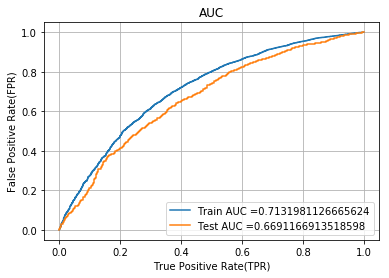

In [147]:
SGD=SGDClassifier(loss='log',alpha=0.001)

final1 = SGD.fit(features_tfid_av, yTrain)
final = SGD.predict_proba(xTest_features_w2v)
print(final)
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(yTrain, y_train_pred1_w2v)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(yTest, y_test_pred_w2v)
plt.plot(train_fpr1, train_tpr1, label="Train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="Test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [152]:
from sklearn.metrics import confusion_matrix
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_tf = find_best_threshold(tr_thresholds, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(yTrain, predict_with_best_t(y_train_pred1_w2v, best_t_tf)))
print("Test confusion matrix")
print(confusion_matrix(yTest, predict_with_best_t(y_test_pred_w2v, best_t_tf)))

the maximum value of tpr*(1-fpr) 0.4384645345287669 for threshold 0.787
Train confusion matrix
[[1698  784]
 [4912 8606]]
Test confusion matrix
[[  20  547]
 [  34 3399]]


   actual values:NO  actual value:YES
0              1698               784
1              4912              8606


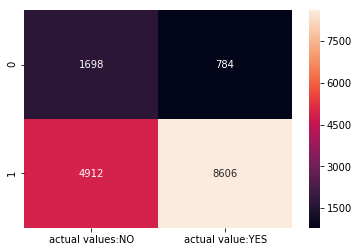

In [153]:
heatmap_matrix = ps.DataFrame(confusion_matrix(yTrain, predict_with_best_t(y_train_pred1_w2v, best_t_tf)),columns=["actual values:NO",'actual value:YES'])
print(heatmap_matrix)
sn.heatmap(heatmap_matrix,annot=True, fmt='g')  
plt.show()

In [156]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
x.add_row(["BOW", "Brute", 1, 0.50])
x.add_row(["TFIDF", "Brute", 1, 0.66])
x.add_row(['w2v','Brute',1,0.66])
x.add_row(['tfidf_w2v','Brute',1,0.66])
x.add_row(['Numerical features','Brute',1,0.5])
print(x)

+--------------------+-------+-----------------+------+
|     Vectorizer     | Model | Hyper Parameter | AUC  |
+--------------------+-------+-----------------+------+
|        BOW         | Brute |        1        | 0.5  |
|       TFIDF        | Brute |        1        | 0.66 |
|        w2v         | Brute |        1        | 0.66 |
|     tfidf_w2v      | Brute |        1        | 0.66 |
| Numerical features | Brute |        1        | 0.5  |
+--------------------+-------+-----------------+------+
